In [187]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import seaborn as sns
import matplotlib as mpl
from pathlib import Path

In [159]:
participants = ['P_149', 'P_238', 'P_407', 'P_426', 'P_577', 'P_668', 'P_711', 'P_950']
data_folder = Path('/Users/jg/Desktop/upper_limb/paper_data')
#make df using the participants as index
df = pd.DataFrame(index=participants, columns=pd.MultiIndex.from_product([['init', 'offline'], ['val', 'test', 'total']]))
df.loc[:, 'participants'] = df.index



In [160]:
# init
mapping = pd.read_csv(data_folder / 'offline_mapping.csv')
mapping.set_index('person_dir', inplace=True)
mapping.columns = pd.MultiIndex.from_tuples([('run', 'init')])
df = df.merge(mapping, left_index=True, right_index=True)
df.set_index(('run', 'init'), inplace=True)

# val
data = pd.read_csv(data_folder / 'offline_val_loss.csv')
for key in df.index:
    df.loc[key, ('init', 'val')] = data.loc[0, f'{key} - total_val_loss']
    
# test
data = pd.read_csv(data_folder / 'offline_test_loss.csv')
for key in df.index:
    df.loc[key, ('init', 'test')] = data.loc[0, f'{key} - total_test_loss']
    
# total
df.loc[:, ('init', 'total')] = (df.loc[:, ('init', 'val')] * 9 + df.loc[:, ('init', 'test')] * 3) / 12


In [161]:
# offline
df.set_index('participants', inplace=True, drop=False)
mapping = pd.read_csv(data_folder / 'offline_mapping.csv')
mapping.set_index('person_dir', inplace=True)
mapping.columns = pd.MultiIndex.from_tuples([('run', 'offline')])
df = df.merge(mapping, left_index=True, right_index=True)
df.set_index(('run', 'offline'), inplace=True)

# val
data = pd.read_csv(data_folder / 'offline_val_loss.csv')
for key in df.index:
    df.loc[key, ('offline', 'val')] = data.loc[len(data)-1, f'{key} - total_val_loss']
    
# test
data = pd.read_csv(data_folder / 'offline_test_loss.csv')
for key in df.index:
    df.loc[key, ('offline', 'test')] = data.loc[len(data)-1, f'{key} - total_test_loss']
    
# total
df.loc[:, ('offline', 'total')] = (df.loc[:, ('offline', 'val')] * 9 + df.loc[:, ('offline', 'test')] * 3) / 12

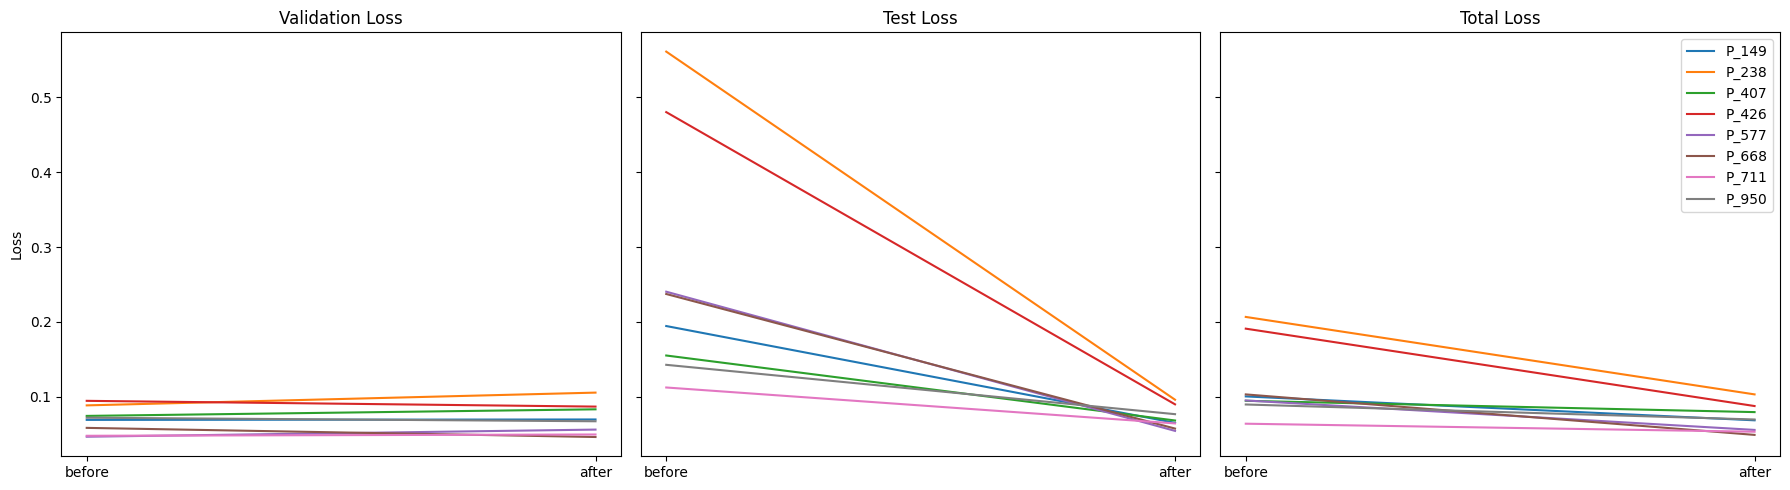

In [179]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots with independent y-axis limits
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Set index
df.set_index('participants', inplace=True, drop=False)

# Modes to plot
modes = ['val', 'test', 'total']

# Plot each mode in a separate subplot
for idx, (ax, mode) in enumerate(zip(axes, modes)):
    for participant in participants:
        ax.plot(['before', 'after'], 
                [df.loc[participant, ('init', mode)], df.loc[participant, ('offline', mode)]], 
                label=participant)
    name = 'Validation' if mode == 'val' else 'Test' if mode == 'test' else 'Total'
    ax.set_title(f'{name} Loss')
    
    # Set ylabel only for the first subplot
    if idx == 0:
        ax.set_ylabel('Loss')

    # Add legend only to the last subplot
    if idx == 2:  # Last subplot
        ax.legend(loc='upper right')



# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [189]:
# pert_init
mapping = pd.read_csv(data_folder / 'pert_offline_mapping.csv')
mapping.set_index('person_dir', inplace=True)
mapping.columns = pd.MultiIndex.from_tuples([('run', 'pert_init')])
df = df.merge(mapping, left_index=True, right_index=True)
df.set_index(('run', 'pert_init'), inplace=True)

# val
data = pd.read_csv(data_folder / 'pert_offline_val_loss.csv')
for key in df.index:
    df.loc[key, ('pert_init', 'val')] = data.loc[0, f'{key} - total_val_loss']

# test
data = pd.read_csv(data_folder / 'pert_offline_test_loss.csv')
for key in df.index:
    df.loc[key, ('pert_init', 'test')] = data.loc[0, f'{key} - total_test_loss']

# total
df.loc[:, ('pert_init', 'total')] = (df.loc[:, ('pert_init', 'val')] * 9 + df.loc[:, ('pert_init', 'test')] * 3) / 12


In [192]:
# pert_offline
df.set_index('participants', inplace=True, drop=False)
mapping = pd.read_csv(data_folder / 'pert_offline_mapping.csv')
mapping.set_index('person_dir', inplace=True)
mapping.columns = pd.MultiIndex.from_tuples([('run', 'pert_offline')])
df = df.merge(mapping, left_index=True, right_index=True)
df.set_index(('run', 'pert_offline'), inplace=True)

# val
data = pd.read_csv(data_folder / 'pert_offline_val_loss.csv')
for key in df.index:
    df.loc[key, ('pert_offline', 'val')] = data.loc[len(data)-1, f'{key} - total_val_loss']
    
# test
data = pd.read_csv(data_folder / 'pert_offline_test_loss.csv')
for key in df.index:
    df.loc[key, ('pert_offline', 'test')] = data.loc[len(data)-1, f'{key} - total_test_loss']
    
# total
df.loc[:, ('pert_offline', 'total')] = (df.loc[:, ('pert_offline', 'val')] * 9 + df.loc[:, ('pert_offline', 'test')] * 3) / 12

0.09284330587575415
0.09237578619892395
0.0927264259565466


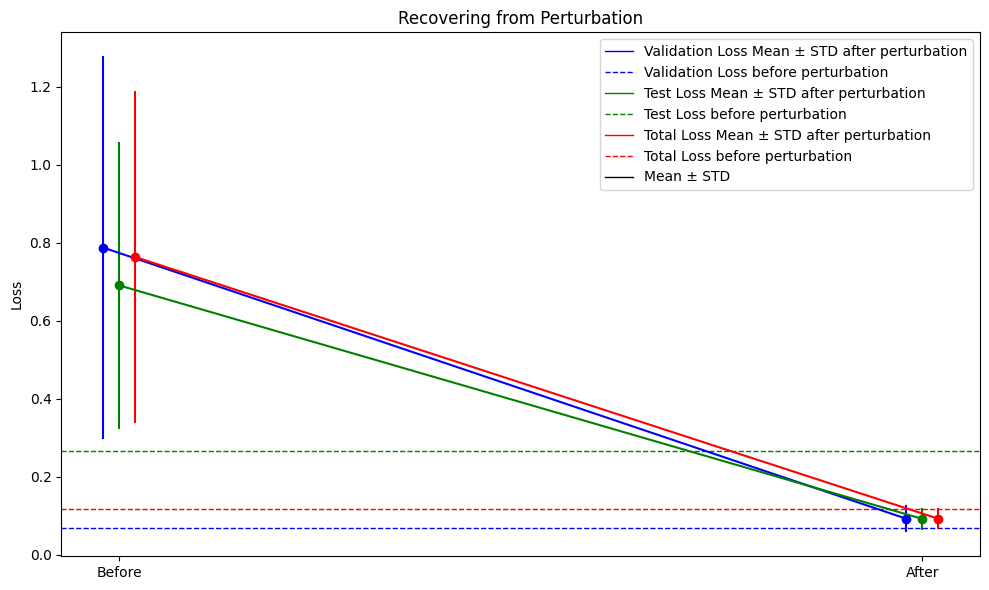

In [218]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Create a figure and a single set of axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set index
df.set_index('participants', inplace=True, drop=False)

# Modes to plot
modes = ['val', 'test', 'total']
colors = ['blue', 'green', 'red']  # Different colors for each mode
labels = ['Validation Loss', 'Test Loss', 'Total Loss']  # Labels for each mode

# X positions for 'before' and 'after'
x_positions = np.arange(2)  # Positions for 'before' and 'after'
bar_width = 0.02  # Used for shifting

# Create a list to store custom legend handles
custom_legend_handles = []

# Plot each mode on the same axes
for idx, (mode, color, label) in enumerate(zip(modes, colors, labels)):
    # Extract data
    means_before = []
    means_after = []

    for participant in participants:
        means_before.append(df.loc[participant, ('pert_init', mode)])
        means_after.append(df.loc[participant, ('pert_offline', mode)])

    # Convert lists to numpy arrays
    means_before = np.array(means_before)
    means_after = np.array(means_after)

    # Calculate mean and std for plotting
    mean_before = np.mean(means_before)
    mean_after = np.mean(means_after)
    std_before = np.std(means_before)
    std_after = np.std(means_after)

    # Calculate the mean of 'init' for the dotted horizontal line
    mean_init = np.mean([df.loc[participant, ('init', mode)] for participant in participants])

    # X offset for each mode to avoid overlap
    x_offset = (idx - 1) * bar_width  # Shift each line plot slightly
    
    # Plot mean and std for each mode with error bars
    ax.errorbar(x_positions + x_offset, 
                [mean_before, mean_after], 
                yerr=[std_before, std_after], 
                fmt='-o', 
                color=color,
                label=label)

    # Plot dotted horizontal line for each mode
    line = ax.axhline(y=mean_init, color=color, linestyle='--', linewidth=1)

    # Add custom legend handle for the dotted line
    custom_legend_handles.append(Line2D([0], [0], color=color, linestyle='-', linewidth=1, label=f'{label} Mean ± STD after perturbation'))

    custom_legend_handles.append(Line2D([0], [0], color=color, linestyle='--', linewidth=1, label=f'{label} before perturbation'))

# Set titles and labels
ax.set_title('Recovering from Perturbation')
ax.set_ylabel('Loss')

# Adjust x-axis ticks and labels
ax.set_xticks(x_positions)
ax.set_xticklabels(['Before', 'After'])

# Add legend with custom handles
ax.legend(handles=custom_legend_handles + [Line2D([0], [0], color='black', linestyle='-', linewidth=1, label='Mean ± STD')],
          loc='upper right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [225]:
online = pd.read_csv(data_folder / 'online.csv')
online.set_index('Name', inplace=True)

In [230]:
for participant in participants:
    df.loc[participant, ('online', 'val')] = online.loc[participant, 'last.total_val_loss']
    df.loc[participant, ('online', 'test')] = online.loc[participant, 'last.total_test_loss']
df.loc[:, ('online', 'total')] = (df.loc[:, ('online', 'val')] * 9 + df.loc[:, ('online', 'test')] * 3) / 12


In [234]:
df

init                       offline                      \
                   val      test     total       val      test     total   
participants                                                               
P_149         0.069114  0.194528  0.100468  0.069659  0.065158  0.068534   
P_238         0.088496  0.561278  0.206692  0.105554  0.096063  0.103181   
P_407         0.074422  0.155152  0.094605  0.083234  0.068298    0.0795   
P_426         0.094565  0.480403  0.191024  0.086856  0.089884  0.087613   
P_577         0.046609  0.240426  0.095063  0.056142  0.054397  0.055705   
P_668         0.058427  0.237348  0.103157  0.046225  0.057503  0.049045   
P_711         0.047867  0.112397  0.063999  0.049586  0.064386  0.053286   
P_950         0.072018  0.142696  0.089687   0.06726  0.076744  0.069631   

             participants pert_init                     pert_offline  \
                                val      test     total          val   
participants                                                           
P_149               P_149  0.189741  0.340884  0.227526     0.074680   
P_238               P_238  0.789844  0.487811  0.714335     0.172677   
P_407               P_407  1.325295  0.967134  1.235755     0.111693   
P_426               P_426  0.542942  0.731491  0.590079     0.111261   
P_577               P_577  0.374727  0.262904  0.346771     0.065095   
P_668               P_668  0.570223  1.322157  0.758207     0.073679   
P_711               P_711  1.785809  1.067719  1.606287     0.059586   
P_950               P_950  0.723337  0.345664  0.628919     0.074077   

                                    online                      
                  test     total       val      test     total  
participants                                                    
P_149         0.090062  0.078526  0.090855  0.102897  0.093866  
P_238         0.098047  0.154019  0.105723  0.344469  0.165409  
P_407         0.076183  0.102815  0.167945  0.115845  0.154920  
P_426         0.108771  0.110638  0.118721  0.201107  0.139318  
P_577         0.152280  0.086891  0.082588  0.051743  0.074877  
P_668         0.053682  0.068679  0.052270  0.111978  0.067197  
P_711         0.077525  0.064071  0.078858  0.075846  0.078105  
P_950         0.082457  0.076172  0.071318  0.102327  0.079070

In [236]:
online = pd.read_csv(data_folder / 'pert_online.csv')
online.set_index('Name', inplace=True)
for participant in participants:
    df.loc[participant, ('pert_online', 'val')] = online.loc[participant + '_perturb', 'last.total_val_loss']
    df.loc[participant, ('pert_online', 'test')] = online.loc[participant  + '_perturb', 'last.total_test_loss']
df.loc[:, ('pert_online', 'total')] = (df.loc[:, ('pert_online', 'val')] * 9 + df.loc[:, ('pert_online', 'test')] * 3) / 12


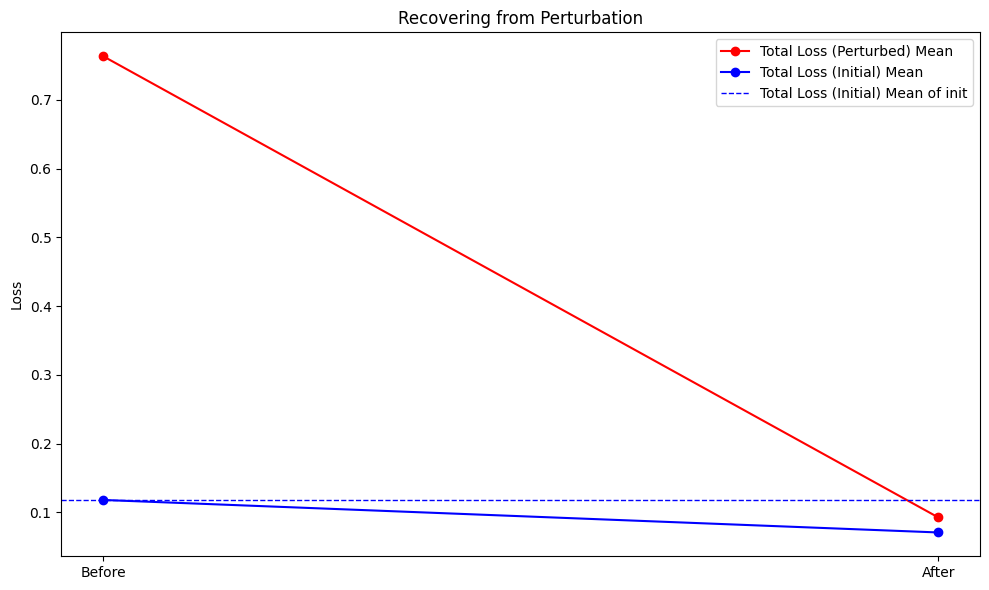

In [240]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Create a figure and a single set of axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set index
df.set_index('participants', inplace=True, drop=False)

# Mode to plot
mode = 'total'
color_pert = 'red'  # Color for the perturbed loss
color_init = 'blue'  # Color for the initial loss
label_pert = 'Total Loss (Perturbed)'  # Label for the perturbed loss
label_init = 'Total Loss (Initial)'  # Label for the initial loss

# X positions for 'before' and 'after'
x_positions = np.arange(2)  # Positions for 'before' and 'after'

# Extract data for perturbed loss
means_before_pert = []
means_after_pert = []

for participant in participants:
    means_before_pert.append(df.loc[participant, ('pert_init', mode)])
    means_after_pert.append(df.loc[participant, ('pert_offline', mode)])

# Convert lists to numpy arrays
means_before_pert = np.array(means_before_pert)
means_after_pert = np.array(means_after_pert)

# Calculate mean for plotting perturbed loss
mean_before_pert = np.mean(means_before_pert)
mean_after_pert = np.mean(means_after_pert)

# Extract data for initial loss
means_before_init = []
means_after_init = []

for participant in participants:
    means_before_init.append(df.loc[participant, ('init', mode)])
    means_after_init.append(df.loc[participant, ('offline', mode)])

# Convert lists to numpy arrays
means_before_init = np.array(means_before_init)
means_after_init = np.array(means_after_init)

# Calculate mean for plotting initial loss
mean_before_init = np.mean(means_before_init)
mean_after_init = np.mean(means_after_init)

# Calculate the mean of 'init' for the dotted horizontal line
mean_init = np.mean([df.loc[participant, ('init', mode)] for participant in participants])

# Plot mean values as lines
ax.plot(['Before', 'After'], [mean_before_pert, mean_after_pert], '-o', color=color_pert, label=f'{label_pert} Mean')
ax.plot(['Before', 'After'], [mean_before_init, mean_after_init], '-o', color=color_init, label=f'{label_init} Mean')

# Plot dotted horizontal line for the mean of 'init'
ax.axhline(y=mean_init, color=color_init, linestyle='--', linewidth=1, label=f'{label_init} Mean of init')

# Set titles and labels
ax.set_title('Recovering from Perturbation')
ax.set_ylabel('Loss')

# Add legend
ax.legend(loc='upper right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


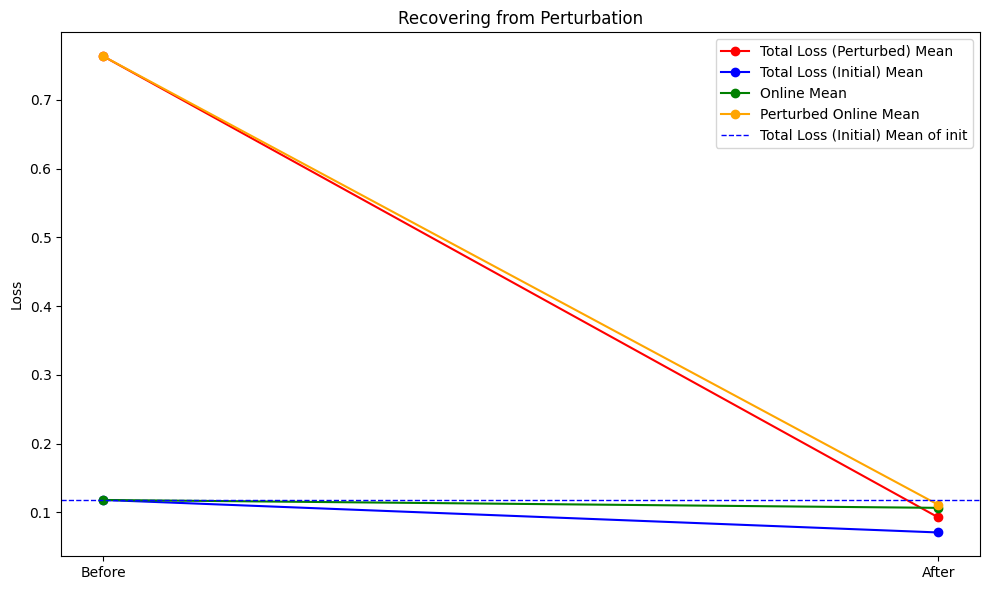

In [241]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Create a figure and a single set of axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set index
df.set_index('participants', inplace=True, drop=False)

# Mode to plot
mode = 'total'
color_pert = 'red'  # Color for the perturbed loss
color_init = 'blue'  # Color for the initial loss
color_online = 'green'  # Color for online
color_offline = 'orange'  # Color for offline
label_pert = 'Total Loss (Perturbed)'  # Label for the perturbed loss
label_init = 'Total Loss (Initial)'  # Label for the initial loss

# X positions for 'before' and 'after'
x_positions = np.arange(2)  # Positions for 'before' and 'after'

# Extract data for perturbed loss
means_before_pert = []
means_after_pert = []

for participant in participants:
    means_before_pert.append(df.loc[participant, ('pert_init', mode)])
    means_after_pert.append(df.loc[participant, ('pert_offline', mode)])

# Convert lists to numpy arrays
means_before_pert = np.array(means_before_pert)
means_after_pert = np.array(means_after_pert)

# Calculate mean for plotting perturbed loss
mean_before_pert = np.mean(means_before_pert)
mean_after_pert = np.mean(means_after_pert)

# Extract data for initial loss
means_before_init = []
means_after_init = []

for participant in participants:
    means_before_init.append(df.loc[participant, ('init', mode)])
    means_after_init.append(df.loc[participant, ('offline', mode)])

# Convert lists to numpy arrays
means_before_init = np.array(means_before_init)
means_after_init = np.array(means_after_init)

# Calculate mean for plotting initial loss
mean_before_init = np.mean(means_before_init)
mean_after_init = np.mean(means_after_init)

# Extract data for online
means_before_online = []
means_after_online = []

for participant in participants:
    means_before_online.append(df.loc[participant, ('init', mode)])
    means_after_online.append(df.loc[participant, ('online', mode)])  # Use 'online' instead of 'offline'

# Convert lists to numpy arrays
means_before_online = np.array(means_before_online)
means_after_online = np.array(means_after_online)

# Calculate mean for plotting online
mean_before_online = np.mean(means_before_online)
mean_after_online = np.mean(means_after_online)

# Extract data for perturbed online
means_before_pert_online = []
means_after_pert_online = []

for participant in participants:
    means_before_pert_online.append(df.loc[participant, ('pert_init', mode)])
    means_after_pert_online.append(df.loc[participant, ('pert_online', mode)])  # Use 'pert_online' instead of 'pert_offline'

# Convert lists to numpy arrays
means_before_pert_online = np.array(means_before_pert_online)
means_after_pert_online = np.array(means_after_pert_online)

# Calculate mean for plotting perturbed online
mean_before_pert_online = np.mean(means_before_pert_online)
mean_after_pert_online = np.mean(means_after_pert_online)

# Calculate the mean of 'init' for the dotted horizontal line
mean_init = np.mean([df.loc[participant, ('init', mode)] for participant in participants])

# Plot mean values as lines
ax.plot(['Before', 'After'], [mean_before_pert, mean_after_pert], '-o', color=color_pert, label=f'{label_pert} Mean')
ax.plot(['Before', 'After'], [mean_before_init, mean_after_init], '-o', color=color_init, label=f'{label_init} Mean')
ax.plot(['Before', 'After'], [mean_before_online, mean_after_online], '-o', color=color_online, label='Online Mean')
ax.plot(['Before', 'After'], [mean_before_pert_online, mean_after_pert_online], '-o', color=color_offline, label='Perturbed Online Mean')

# Plot dotted horizontal line for the mean of 'init'
ax.axhline(y=mean_init, color=color_init, linestyle='--', linewidth=1, label=f'{label_init} Mean of init')

# Set titles and labels
ax.set_title('Recovering from Perturbation')
ax.set_ylabel('Loss')

# Add legend
ax.legend(loc='upper right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
